In [54]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [55]:
zomato=pd.read_csv(r"C:\Users\karthik\Desktop\code\ZOMATO\zomato.csv",sep=',', encoding='latin-1')
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Preprocessing

In [56]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [57]:
# dataframe with numerical features
zomato.describe(include=['int64'])

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [58]:
# dataframe with categorical features
zomato.describe(include=['object'])

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/lennys-kitche...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


## Missing Data Analysis

In [59]:
zomato.shape

(51717, 17)

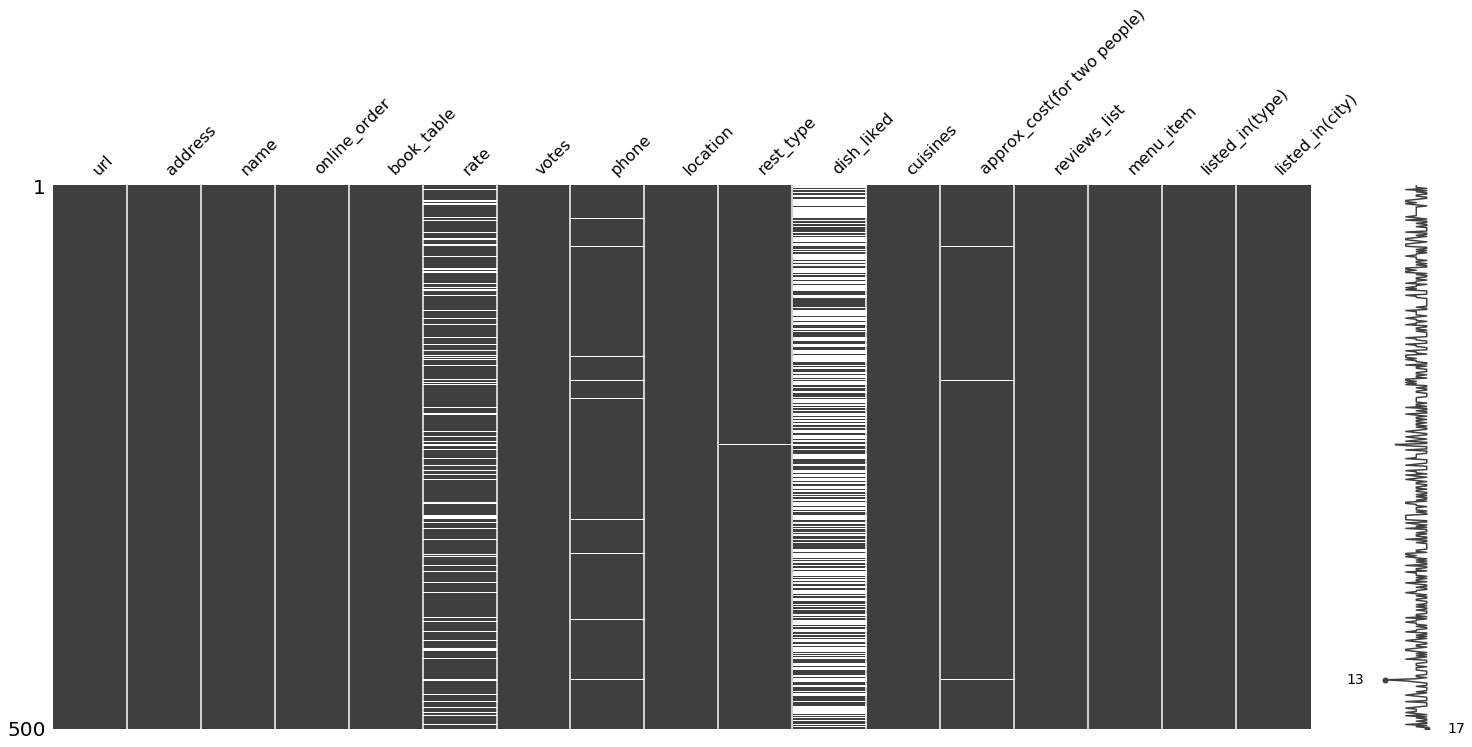

In [60]:
import missingno as msno
%matplotlib inline
msno.matrix(zomato.sample(500))

In [61]:
total=zomato.isnull().sum().sort_values(ascending=False)
total

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
address                            0
name                               0
online_order                       0
book_table                         0
listed_in(city)                    0
votes                              0
listed_in(type)                    0
reviews_list                       0
menu_item                          0
url                                0
dtype: int64

In [62]:
percent =(zomato.isnull().sum()/zomato.shape[0]).sort_values(ascending=False)*100
percent

dish_liked                     54.291626
rate                           15.033741
phone                           2.335789
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location                        0.040606
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
listed_in(city)                 0.000000
votes                           0.000000
listed_in(type)                 0.000000
reviews_list                    0.000000
menu_item                       0.000000
url                             0.000000
dtype: float64

In [63]:
missingdata = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missingdata.head(32)

,Total,Percent
dish_liked,28078,54.291626
rate,7775,15.033741
phone,1208,2.335789
approx_cost(for two people),346,0.669026
rest_type,227,0.438927
cuisines,45,0.087012
location,21,0.040606
address,0,0.000000
name,0,0.000000
online_order,0,0.000000


In [64]:
zomato = zomato[pd.notnull(zomato['dish_liked'])]
zomato['dish_liked'] = zomato['dish_liked'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['rate'])]
zomato['rate'] = zomato['rate'].str.replace(' ', '')
zomato = zomato[zomato['rate'] != 'NEW']
zomato = zomato[zomato['rate'] != '-']

zomato = zomato[pd.notnull(zomato['rest_type'])]
zomato['rest_type'] = zomato['rest_type'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['cuisines'])]
zomato['cuisines'] = zomato['cuisines'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['location'])]
zomato['location'] = zomato['location'].str.replace(',', '')

zomato = zomato[pd.notnull(zomato['approx_cost(for two people)'])]
zomato['approx_cost(for two people)'].replace(np.NaN, zomato['approx_cost(for two people)'].mode())

zomato = zomato.rename(columns={"approx_cost(for two people)":"cost_for_2"})
zomato.reset_index(inplace = True)

zomato.drop(['url', 'cost_for_2', 'index','address','name','online_order','book_table','votes','phone','reviews_list','menu_item','listed_in(type)','listed_in(city)'], inplace = True,axis=1)
zomato.shape

(23259, 5)

In [65]:
zomato.head()

,rate,location,rest_type,dish_liked,cuisines
0,4.1/5,Banashankari,Casual Dining,Pasta Lunch Buffet Masala Papad Paneer Lajawab...,North Indian Mughlai Chinese
1,4.1/5,Banashankari,Casual Dining,Momos Lunch Buffet Chocolate Nirvana Thai Gree...,Chinese North Indian Thai
2,3.8/5,Banashankari,Cafe Casual Dining,Churros Cannelloni Minestrone Soup Hot Chocola...,Cafe Mexican Italian
3,3.7/5,Banashankari,Quick Bites,Masala Dosa,South Indian North Indian
4,3.8/5,Basavanagudi,Casual Dining,Panipuri Gol Gappe,North Indian Rajasthani


In [66]:
type(zomato)

pandas.core.frame.DataFrame

## Gaussian

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [69]:
catagories = zomato['rate']
catagories = np.unique(catagories)
lables = catagories.tolist()
lables.pop(0)

'1.8/5'

In [70]:
X= zomato["location"]+ " "+ zomato["cuisines"]+ " "+ zomato["dish_liked"]+ " "+ zomato["rest_type"]
y = zomato['rate']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)
print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

v = TfidfVectorizer()

x_train_tf = v.fit_transform(X_train)
x_test_tf = v.transform(X_test)
y_expect = y_test

(18607,) (18607,)
(4652,) (4652,)


In [71]:
GausNB = GaussianNB()
GausNB.fit(x_train_tf.toarray(), y_train)
y_pred_Gaus = GausNB.predict(x_test_tf.toarray())
print('accuracy score: ', accuracy_score(y_expect, y_pred_Gaus)*100, '%')

accuracy score:  33.125537403267415 %


## MultinomialNB 

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
count_vect = CountVectorizer()
x_train_tf = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_tf)

x_train_tfidf.shape

(18607, 1540)

In [120]:
x_test_tf = count_vect.transform(X_test)
x_test_tfidf = tfidf_transformer.transform(x_test_tf)

In [121]:
clf = MultinomialNB().fit(x_train_tfidf, y_train)
predict = clf.predict(x_test_tfidf)

In [78]:
print('accuracy :',accuracy_score(y_test, predict))
print(metrics.classification_report(y_test, predict))
metrics.confusion_matrix(y_test, predict)

accuracy : 0.37037833190025793
              precision    recall  f1-score   support

       1.8/5       0.00      0.00      0.00         2
       2.0/5       0.00      0.00      0.00         2
       2.1/5       0.00      0.00      0.00         6
       2.2/5       0.00      0.00      0.00         6
       2.3/5       0.00      0.00      0.00         9
       2.4/5       0.00      0.00      0.00        12
       2.5/5       0.00      0.00      0.00        10
       2.6/5       0.00      0.00      0.00        37
       2.7/5       0.00      0.00      0.00        32
       2.8/5       0.00      0.00      0.00        66
       2.9/5       0.00      0.00      0.00        58
       3.0/5       1.00      0.02      0.03        64
       3.1/5       0.00      0.00      0.00        62
       3.2/5       0.00      0.00      0.00        64
       3.3/5       0.00      0.00      0.00        43
       3.4/5       1.00      0.02      0.03        65
       3.5/5       0.91      0.10      0.18       

C:\Users\karthik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   3,   0,   2,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   2,   0,   0,   2,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   4,   4,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,

## LR KNN and SVM 

In [83]:
import sklearn
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [84]:
catagories = zomato['rate']
catagories = np.unique(catagories)
lables = catagories.tolist()
type(lables)

list

In [85]:
x = zomato["location"] + " " +zomato["cuisines"]+ " " +zomato["rest_type"]+ " " +zomato["dish_liked"]
y = zomato["rate"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 7)

In [87]:
count_vect = CountVectorizer()
x_train_tf = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_tf)

In [88]:
x_test_tf = count_vect.transform(X_test)
x_test_tfidf = tfidf_transformer.transform(x_test_tf)

In [89]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = 7)
    cv_results = model_selection.cross_val_score(model, x_train_tfidf, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\karthik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\karthik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\karthik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

LR: 0.503152 (0.011971)
KNN: 0.688489 (0.007315)


C:\Users\karthik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.804288 (0.005990)


In [90]:
for name, model in models:
    model.fit(x_train_tfidf, y_train)
    predictions = model.predict(x_test_tfidf)
    print(name)
    print(accuracy_score(y_test, predictions)*100,'%')
    print(classification_report(y_test, predictions)*100,'%')

C:\Users\karthik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\karthik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR
50.69647463456578 %
              precision    recall  f1-score   support

       1.8/5       0.00      0.00      0.00         1
       2.0/5       1.00      1.00      1.00         2
       2.1/5       0.00      0.00      0.00         7
       2.2/5       1.00      1.00      1.00         4
       2.3/5       1.00      0.17      0.29        12
       2.4/5       0.00      0.00      0.00        17
       2.5/5       0.00      0.00      0.00        14
       2.6/5       1.00      0.07      0.12        30
       2.7/5       0.79      0.27      0.40        41
       2.8/5       0.96      0.27      0.42        89
       2.9/5       0.68      0.23      0.34        66
       3.0/5       0.53      0.13      0.21        63
       3.1/5       0.71      0.12      0.21        81
       3.2/5       0.00      0.00      0.00        60
       3.3/5       0.42      0.12      0.19        42
       3.4/5       0.77      0.26      0.39        87
       3.5/5       0.68      0.19      0.30       130
    

KNN
72.84608770421325 %
              precision    recall  f1-score   support

       1.8/5       1.00      1.00      1.00         1
       2.0/5       1.00      1.00      1.00         2
       2.1/5       1.00      0.57      0.73         7
       2.2/5       0.80      1.00      0.89         4
       2.3/5       0.62      0.67      0.64        12
       2.4/5       0.55      0.65      0.59        17
       2.5/5       0.41      0.50      0.45        14
       2.6/5       0.39      0.73      0.51        30
       2.7/5       0.60      0.80      0.69        41
       2.8/5       0.60      0.74      0.66        89
       2.9/5       0.55      0.71      0.62        66
       3.0/5       0.45      0.62      0.52        63
       3.1/5       0.56      0.56      0.56        81
       3.2/5       0.43      0.48      0.46        60
       3.3/5       0.58      0.43      0.49        42
       3.4/5       0.61      0.67      0.64        87
       3.5/5       0.61      0.58      0.60       130
   

SVM
82.87188306104902 %
              precision    recall  f1-score   support

       1.8/5       1.00      1.00      1.00         1
       2.0/5       1.00      1.00      1.00         2
       2.1/5       1.00      0.86      0.92         7
       2.2/5       1.00      1.00      1.00         4
       2.3/5       1.00      0.83      0.91        12
       2.4/5       1.00      0.59      0.74        17
       2.5/5       0.89      0.57      0.70        14
       2.6/5       0.87      0.67      0.75        30
       2.7/5       0.84      0.78      0.81        41
       2.8/5       0.97      0.79      0.87        89
       2.9/5       0.85      0.71      0.78        66
       3.0/5       0.91      0.63      0.75        63
       3.1/5       0.88      0.62      0.72        81
       3.2/5       0.86      0.53      0.66        60
       3.3/5       0.77      0.48      0.59        42
       3.4/5       0.83      0.67      0.74        87
       3.5/5       0.84      0.71      0.77       130
   

In [93]:
knn=KNeighborsClassifier()
mod=knn.fit(x_train_tfidf, y_train)
predics = mod.predict(x_test_tfidf)

In [94]:
print(accuracy_score(y_test, predics)*100,'%')

72.82889079965607 %


## Decision Tree

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #replacement for count vectorizer and inverse frequency transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [106]:
catagories = zomato['rate']
catagories = np.unique(catagories)
lables = catagories.tolist()
lables.pop(0)
y= zomato['rate']
x= zomato["location"]+ " "+ zomato["cuisines"]+ " "+ zomato["dish_liked"]+ " "+ zomato["rest_type"]
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2)
print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
v = TfidfVectorizer()
x_train_tf= v.fit_transform(X_train)
x_test_tf= v.transform(X_test)
y_expect = y_test

(18607,) (18607,)
(4652,) (4652,)


In [107]:
type(y_train)

pandas.core.series.Series

In [108]:
DT = DecisionTreeClassifier(random_state=100)
DT.fit(x_train_tf, y_train)
y_pred_gini = DT.predict(x_test_tf)
print('accuracy score', accuracy_score(y_expect, y_pred_gini)*100, '%')

accuracy score 87.10232158211522 %


## Random Forest

In [109]:
 #replacement for count vectorizer and inverse frequency transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [110]:
zomato['rate'] = zomato['rate'].str.replace('/5', '')
x= zomato["location"]+ " "+ zomato["cuisines"]+ " "+ zomato["dish_liked"]+ " "+ zomato["rest_type"]
y= zomato['rate']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2)
print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(18607,) (18607,)
(4652,) (4652,)


In [112]:
v = TfidfVectorizer()
x_train_tf= v.fit_transform(X_train)

In [113]:
x_test_tf= v.transform(X_test)

In [114]:
rf = RandomForestRegressor(n_estimators = 15, random_state = 100)
rf.fit(x_train_tf, y_train.astype(float))
y_pred_rf= rf.predict(x_test_tf)
print('R2 score:', r2_score(y_test, y_pred_rf)*100, '%')

R2 score: 91.60763212797328 %


In [115]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 0.04511216158381939
Mean Squared Error: 0.01546162994909724
Root Mean Squared Error: 0.12434480266218302


## Linear Regression

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()

In [123]:
classf = LR.fit(x_train_tfidf, y_train)
predict = classf.predict(x_test_tfidf)

In [124]:
print('r2_score :',r2_score(y_test, predict))

r2_score : 0.5549955089621827
